# Redes Neuronales

Las redes neuronales artificiales (ANNs) son un tipo de modelo inspirado en el
funcionamiento del cerebro humano. Se componen de capas de nodos (neuronas)
que reciben datos de entrada, los procesan mediante funciones de activación y
generan una salida. Son especialmente útiles cuando los datos tienen patrones
complejos, como imágenes, texto o series de tiempo.

## La neurona matemática

Es la unidad de cómputo fundamental que está en las redes neuronales, la cual
está representada por una combinación de funciones. La operación que ocurre en
cada neurona es una combinación lineal entre los datos de entrada y pesos **w**,
más un sesgo **b** y luego se le aplica una activación no lineal (ReLU, Sigmoide,
Tanh). Los parámetros que se buscan entrenar son los pesos **w** y el sesgo **b**,
los cuales orientan y desplazan el plano, respectivamente.

Desde el punto de vista geométrico, una neurona define un hiperplano en el
espacio de entrada. La función de activación determina en qué lado del
hiperplano cae cada punto. A medida que se apilan múltiples capas, la red
puede aprender a separar regiones complejas del espacio de entrada de manera
no lineal.

## Aprendizaje en redes neuronales

El aprendizaje consiste en ajustar los pesos **w** y el sesgo **b** para minimizar
una función de pérdida que mide el error entre las predicciones y las etiquetas reales.
Esto se hace mediante:

1. Propagación hacia adelante (forward pass): calcular la salida de la red.  
2. Cálculo de la pérdida: comparar la salida con el valor esperado.  
3. Retropropagación (backpropagation): calcular los gradientes de la pérdida
   con respecto a los parámetros (derivadas parciales).  
4. Actualización de parámetros: usar un optimizador (como SGD o Adam) para
   mover los pesos en dirección opuesta al gradiente.

## Arquitectura Perceptrón Multicapa (MLP)

Tenemos capas lineales encadenadas que funcionan aplicando funciones
lineales y funciones de activación hasta la salida. Las funciones de
activación rompen la linealidad y permiten modelar curvas arbitrarias.

**Profundidad vs Capacidad:** Más capas implican un mayor poder de
aproximación, pero se pone en riesgo el *overfitting* (sobreajuste) y una mayor
demanda computacional (por el mayor número de parámetros a determinar).

## Funciones de pérdida comunes

- **Cross-Entropy** para clasificación.  
- **MSE (Mean Squared Error)** para regresión.

## Técnicas de regularización

- **Dropout:** apaga neuronas al azar durante el entrenamiento.  
- **Weight Decay (L2):** penaliza pesos grandes.  
- **Early Stopping:** detiene el entrenamiento cuando la validación deja de mejorar.

Todas estas técnicas se utilizan para evitar el *overfitting*.


# PyTorch

PyTorch es un motor de deep learning "eager" y python-first desarrollado por Meta,  
que realiza una ejecución dinámica (eager), es decir, mientras uno va construyendo  
el programa se va ejecutando línea por línea. Esto permite depurar (por ejemplo,  
revisar errores) de manera más sencilla, usando `print`, `pdb` (un depurador que  
proporciona una línea de interacción). Si ocurre algo en el código que no haya funcionado  
o que dé un valor nulo, `pdb` detiene la ejecución y permite inspeccionar variables,  
hacer operaciones y luego continuar con la ejecución (presionando `c` para continuar).

PyTorch puede utilizar GPU o CPU de manera transparente. Es decir, al momento de hacer  
el entrenamiento se puede usar la GPU, y una vez terminado, para la predicción se puede  
pasar el modelo a CPU sin complicaciones.

Posee un ecosistema modular adaptado a distintos contextos:

- **TorchVision:** para visión por computadora.  
- **TorchText:** para procesamiento de texto.  
- **TorchAudio:** para procesamiento de audio.  
- **TorchRL:** para aprendizaje por refuerzo.  
- Integraciones con Hugging Face, Lightning, ONNX, entre otros.

Estos repositorios incluyen modelos ya entrenados, lo que permite realizar *fine-tuning*,  
es decir, entrenar solo algunas capas de la red con nuestros datos a partir de un modelo  
preentrenado.


# Tensores

Un tensor es un arreglo pero el cual no solo guarda los valores sino que en el entrenamiento tambien va a guardar las derivadas parciales de las funciones cuando está ocurriendo el entrenamiento.


In [ ]:
import torch
x = torch.randn(3,4) # Normal(0,1)
z = torch.tensor([[1,2],[3,4]],dtype=torch.float32) # Para no asumirlo como int

In [ ]:
x

tensor([[-0.7232,  0.5876,  0.9116, -1.5647],
        [-1.8482,  0.8497, -1.4006, -0.0680],
        [ 1.0040,  2.3418, -0.0451,  0.2637]])

In [ ]:
z

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
# Cuando ejecutamos x y z están en cpu, entonces vamos a pasar a guardarlos en
# gpu a través de:

x.to('cuda')

# Ahora ocurre que operar z que está en cpu va a ser más costoso que operar x
# que está en gpu (se demorará más).

tensor([[-0.7232,  0.5876,  0.9116, -1.5647],
        [-1.8482,  0.8497, -1.4006, -0.0680],
        [ 1.0040,  2.3418, -0.0451,  0.2637]], device='cuda:0')

Operaciones esenciales

In [ ]:
A = torch.randn(3, 4)
B = torch.randn(4, 5)
x = torch.randn(4)

# Matriz × matriz   → (3,5)
C = A @ B                    # o torch.matmul(A, B)

# Matriz × vector   → (3,)
y = A @ x                    # o torch.mv(A, x)

# Vector × vector   → escalar
dot = x @ x                  # o torch.dot(x, x)

# Batched matmul: (batch, m, n) @ (batch, n, p) → (batch, m, p)
X = torch.randn(10, 3, 4) # Ejera 10 matrices 3x4
Y = torch.randn(10, 4, 2)
Z = X @ Y                    # aplica matmul 10 veces
# Lo anterior sirve para realizar varias operaciones a la vez.

In [ ]:
C

tensor([[ 1.7771,  0.1897, -3.0333, -4.2485, -2.8214],
        [ 0.4226,  0.2885,  1.4805,  0.7950,  2.2156],
        [-0.7704, -0.3344, -0.8159,  0.7145, -0.5087]])

In [ ]:
y

tensor([-0.6673,  0.3019, -0.7593])

In [ ]:
dot

tensor(2.3986)

In [ ]:
Z

tensor([[[-6.1803e+00,  6.2783e-01],
         [ 3.5838e-02,  1.1252e-01],
         [-3.2207e+00, -1.4233e+00]],

        [[ 4.3228e-01,  7.9209e-01],
         [ 1.1028e+00, -1.9615e+00],
         [ 6.4273e-01, -1.2438e+00]],

        [[-1.3933e+00, -1.8111e-01],
         [-1.0557e+00,  1.0819e+00],
         [-1.9701e+00,  2.3082e+00]],

        [[ 1.0090e+00,  3.1150e+00],
         [-7.2040e-01,  6.7236e-02],
         [ 4.4193e-01, -1.8618e+00]],

        [[-4.3098e-01,  1.0421e+00],
         [-2.7150e-01,  6.6377e-01],
         [-3.4085e-01, -1.9971e+00]],

        [[ 2.0619e+00, -4.6193e-01],
         [ 1.9874e+00,  6.2364e-01],
         [-1.5055e+00, -7.9364e-01]],

        [[ 4.1045e-01,  1.7249e+00],
         [ 5.8497e-03, -4.1858e-01],
         [-2.0320e+00,  4.6893e-01]],

        [[ 3.2578e-01,  2.1617e+00],
         [ 1.5988e+00, -2.3116e+00],
         [ 4.3502e-01, -6.0030e-01]],

        [[ 2.7440e-01,  4.8310e-01],
         [ 1.2626e+00,  2.3132e+00],
         [ 1.3662e+00,

Conversión de los arreglos entre Torch y NumPy

In [ ]:
a = x.cpu().numpy()       # Torch → NumPy  (copia cero)
b = torch.from_numpy(a)   # NumPy → Torch  (memoria compartida)

In [ ]:
a

array([-0.7553867,  1.0999527,  0.6023438, -0.5052113], dtype=float32)

In [ ]:
b

tensor([-0.7554,  1.1000,  0.6023, -0.5052])

El siguiente cuadro de código lo que muestra es como al sumar una matriz 3x4 con un vector 1x4, internamente, repite el vector 3 veces para poder sumarlo en todas las filas.

In [ ]:
M = torch.randn(3,4)
v = torch.tensor([1.,2.,3.,4.])

R = M + v
# v se "estira" a (3,4)

print(M)
print()
print(v)
print()
print(R)

tensor([[ 1.3287, -2.0877,  0.8595,  0.1647],
        [ 0.3360, -1.3832, -0.7213, -1.1788],
        [ 0.1937, -0.2492, -0.0743,  0.4196]])

tensor([1., 2., 3., 4.])

tensor([[ 2.3287, -0.0877,  3.8595,  4.1647],
        [ 1.3360,  0.6168,  2.2787,  2.8212],
        [ 1.1937,  1.7508,  2.9257,  4.4196]])


🔁 **Ejemplo de Retropropagación Manual en PyTorch**

Este ejemplo ilustra cómo funciona la retropropagación (backpropagation) de manera simple usando tensores de PyTorch.

Paso a paso:

1. **Definimos dos tensores** `x` y `w` de tamaño 5 con valores aleatorios, ambos con `requires_grad=True` (requires_grad=True le dice a PyTorch que debe rastrear todas las operaciones realizadas sobre ese tensor para que más adelante se pueda calcular el gradiente de una función respecto a ese tensor). Esto le indica a PyTorch que debe rastrear las operaciones realizadas sobre ellos para poder calcular derivadas después.

2. **Calculamos un escalar `y`** como el producto elemento a elemento entre `x` y `w`, seguido de una suma total:

$$
y = \sum_{i=1}^{5} x_i \cdot w_i
$$

3. **Llamamos a `y.backward()`**, que activa el cálculo de los gradientes:

- $$\frac{\partial y}{\partial x_i} = w_i$$
- $$\frac{\partial y}{\partial w_i} = x_i$$

4. **Finalmente, accedemos a los gradientes** con `x.grad` y `w.grad`, que contienen respectivamente los vectores `w` y `x`.

---

Este ejemplo muestra cómo PyTorch construye un grafo computacional dinámico y permite calcular derivadas automáticamente, lo que es fundamental para entrenar redes neuronales.


In [ ]:
# Autograd: Retropropagación Automática

import torch, torch.nn as nn # Neuronal Networks

x = torch.randn(5, requires_grad=True)
w = torch.randn(5, requires_grad=True)

y = (x * w).sum()   # forward
y.backward()        # retroprop

print(x.grad)       # ∂y/∂x
print(w.grad)       # ∂y/∂w

tensor([ 1.6874,  0.4966, -0.3085, -2.3204, -2.2199])
tensor([-0.4703, -0.1614, -0.5429,  1.0091,  0.7563])


# Control de cálculo de gradiente

- Inference/validación: torch.no_grad()
  Desactiva autograd dentro del bloque.
- Congelar capas: param.requires_grad = False
Evita actualizar pesos
- Desacoplar tensor: tensor.detach()
Corta la rama del grafo

**Ventajas clave:**
- Flexibilidad total: El grafo se reconstruye en cada *forward*. Ideal para modelos con flujo de control dinámico (RNN, Graph-NN, etc.)
- Depuración sencilla: Imprime tensores, usa pbd, lanza excepciones como en cualquier script de Python.

Con **autograd** no tenemos que programar las derivadas sino que PyTorch las calcula automáticamente. Por lo tanto, el grafo se mantiene dinámico va cambiando con cada operación que vayamos realizando y se va actualizando hacia atrás con **.backward()**.

El siguiente ejemplo trata de un dataset sintético de círculos concéntricos. La motivación para utilizar esta metodología es que representa un problema no lineal, por lo que la regresión lineal no basta para hacer estimaciones, entonces para eso vamos a utilizar las funciones de activación y así curvar el espacio de separación.

La ventaja de este dataset es que es 2D lo cuál nos ayudará a visualizar el poder y la ventaja de utilizar MLP.

In [ ]:
from sklearn.datasets import make_circles

X_np, y_np = make_circles(n_samples=500, factor=0.4, noise=0.1, random_state=42)
X = torch.tensor(X_np, dtype=torch.float32)   # (500, 2)
y = torch.tensor(y_np, dtype=torch.long)      # 0 ó 1

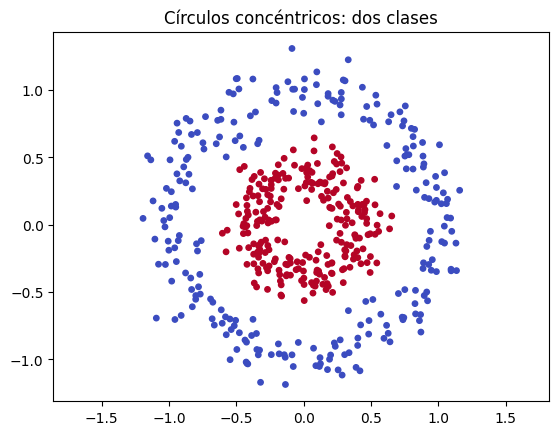

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_np[:,0], X_np[:,1], c=y_np, s=15, cmap="coolwarm")
plt.title("Círculos concéntricos: dos clases")
plt.axis("equal")
plt.show()

Vamos a definir una red, que le llamaremos SimpleNet.

In [ ]:
import torch.nn as nn

# in_dim=2 : Inicialmente entrarán 2 dimensiones (las dimensiones de X)
# hidden=16 : Le decimos que tiene una capa oculta con 16 neuronas
# out_dim=2 : Dimensión de salida, que en este caso es 2 (0 o 1)

class SimpleNet(nn.Module):
    def __init__(self, in_dim=2, hidden=16, out_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, out_dim)   # logits
        )

    def forward(self, x):                # <-- una sola línea
        return self.net(x)

Bucle de entrenamiento

- Learning rate (lr) : Tamaño del paso de optimización
- Batch size : Estabilidad vs Velocidad
- num_epochs : Cuantás pasadas completas por la red sobre los datos

In [ ]:
# ── Preparativos ───────────────────────────────────────────────
device = "cuda" if torch.cuda.is_available() else "cpu"
model     = SimpleNet().to(device)

criterion  = nn.CrossEntropyLoss()              # CE = LogSoftmax + NLLLoss
optimizer  = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 500
loss_history = []

# ── Loop de entrenamiento ─────────────────────────────────────

# Al ser un for podemos ir viendo que ocurre en las épocas

for epoch in range(num_epochs):
    # 1️⃣ Forward pass: Propaga datos por las capas lineales y ReLU
    logits = model(X.to(device))                # (batch, 2)

    # 2️⃣ Cálculo de pérdida: Aplica LogSoftmax + NLLLoss
    loss = criterion(logits, y.to(device))      # y: etiquetas 0/1

    # 3️⃣ Backward pass: Autograd recorre el grafo dinámico y acumula gradientes
    optimizer.zero_grad()                       # limpia grad. previos
    loss.backward()                             # ∂loss/∂params

    # 4️⃣ Actualización de pesos: Actualiza cada parámetro según su gradiente
    optimizer.step()
    loss_history.append(loss.item())  # ← guarda la métrica

    # 5️⃣ Logging opcional: Detecta divergencia o plateaus
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss.item():.4f}")

Epoch 000 | Loss: 0.6965
Epoch 050 | Loss: 0.6590
Epoch 100 | Loss: 0.6097
Epoch 150 | Loss: 0.5423
Epoch 200 | Loss: 0.4703
Epoch 250 | Loss: 0.4050
Epoch 300 | Loss: 0.3483
Epoch 350 | Loss: 0.2994
Epoch 400 | Loss: 0.2583
Epoch 450 | Loss: 0.2239


Gráfico de la evolución del error

Verificar que la pérdida desciende y se estabiliza.

Señales de **alerta**:
- Curva casi plana: Learning rate demasiado bajo
- Curva creciente/oscila mucho: Divergencia (Learning rate alto)

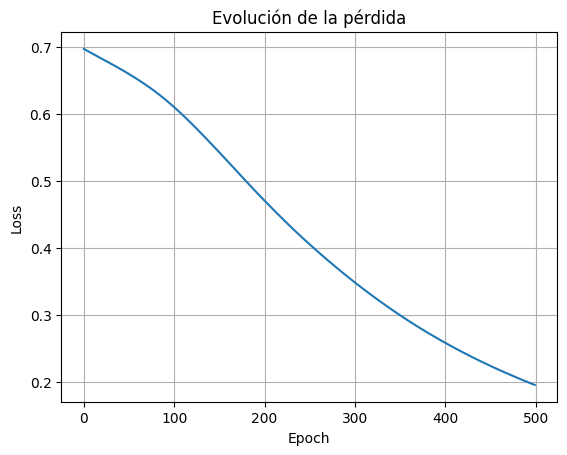

In [ ]:
plt.plot(loss_history)                # loss_history: lista con loss por epoch
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evolución de la pérdida")
plt.grid(True)
plt.show()

Frontera de decisión en 2D

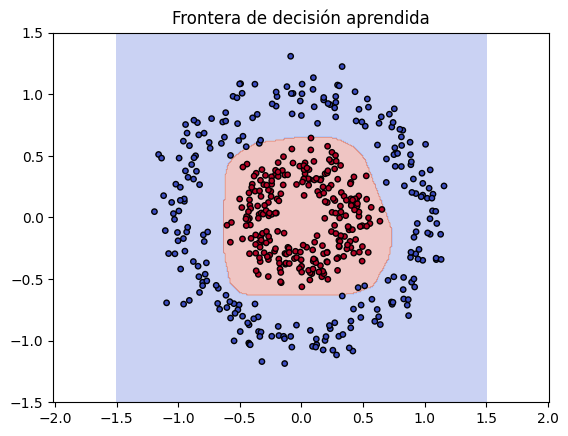

In [ ]:
import numpy as np

# 1. Malla densa sobre el plano
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 300),
                     np.linspace(-1.5, 1.5, 300))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()],
                    dtype=torch.float32).to(device)

# 2. Predicción sin gradientes
with torch.no_grad():
    pred = model(grid).argmax(dim=1).cpu().reshape(xx.shape)

# 3. Gráfico
# Gráfico de contorno de la predicción
plt.contourf(xx, yy, pred, alpha=0.3, cmap="coolwarm")

# Gráfico de los puntos iniciales
plt.scatter(X_np[:,0], X_np[:,1], c=y_np,
            s=15, cmap="coolwarm", edgecolors="k")
plt.title("Frontera de decisión aprendida")
plt.axis("equal")
plt.show()

**Interpretación**
- Contornos lisos que envuelven el círculo interior implica que el MLP captó la no linealidad.
- Frontera irregular "a cuadros" implica que una capacidad insuficiente o pocos datos.

**Diagnóstico rápido**
- Si la pérdida fue baja en el entrenamiento pero alta en la validación estamos ante un problema de overfitting. Las acciones correctivas son Dropout, agregar más datos, Early-Stopping.
- Si la pérdida no baja tenemos un problema de learning rate (lr) muy bajo o red pequeña. Las acciones correctivas serían aumentarlas.
- Si tenemos predicciones 50% aprox. tenemos un problema de inicialización mala o un lr alto. Las acciones correctivas serían bajar el lr o revisar la inicialización.

Ahora vamos a realizar lo mismo pero separando entre datos de entrenamiento y validación.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_np, y_np, test_size=0.2, random_state=42, stratify=y_np)

# Tensores
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.long)
X_val   = torch.tensor(X_val_np,   dtype=torch.float32)
y_val   = torch.tensor(y_val_np,   dtype=torch.long)

Listas necesarias para las gráficas.

In [ ]:
train_loss_hist, val_loss_hist = [], []
val_acc_hist = []

Bucle de entrenamiento y validación

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model  = SimpleNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 500

for epoch in range(num_epochs):
    # ---- TRAIN ----
    model.train()                            # modo entrenamiento
    logits = model(X_train.to(device))
    loss   = criterion(logits, y_train.to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_hist.append(loss.item())

    # ---- VALIDATION ----
    model.eval()                             # desactiva dropout/bn
    with torch.no_grad():
        val_logits = model(X_val.to(device))
        val_loss   = criterion(val_logits, y_val.to(device)).item()

        # Accuracy
        preds = val_logits.argmax(dim=1).cpu()
        val_acc = (preds == y_val).float().mean().item()

    val_loss_hist.append(val_loss)
    val_acc_hist.append(val_acc)

    # Logging
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | "
              f"train loss {loss.item():.4f} | "
              f"val loss {val_loss:.4f} | "
              f"val acc {val_acc*100:.1f}%")

Epoch 000 | train loss 0.6873 | val loss 0.6852 | val acc 49.0%
Epoch 050 | train loss 0.6500 | val loss 0.6506 | val acc 84.0%
Epoch 100 | train loss 0.6105 | val loss 0.6143 | val acc 93.0%
Epoch 150 | train loss 0.5599 | val loss 0.5671 | val acc 95.0%
Epoch 200 | train loss 0.4996 | val loss 0.5091 | val acc 99.0%
Epoch 250 | train loss 0.4378 | val loss 0.4504 | val acc 99.0%
Epoch 300 | train loss 0.3807 | val loss 0.3974 | val acc 98.0%
Epoch 350 | train loss 0.3308 | val loss 0.3511 | val acc 98.0%
Epoch 400 | train loss 0.2878 | val loss 0.3113 | val acc 98.0%
Epoch 450 | train loss 0.2510 | val loss 0.2773 | val acc 98.0%


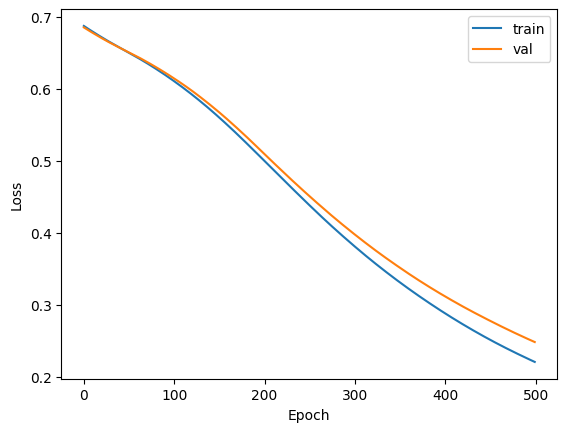

In [ ]:
plt.plot(train_loss_hist, label="train")
plt.plot(val_loss_hist,   label="val")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.show()

Este gráfico se puede utilizar para visualizar si el modelo está realizando overfitting.

Vamos a realizar un Early-Stopping

Lo que haremos es parar el modelo cuando el modelo cumpla un criterio de parada, en este caso cuando la pérdida de validación sea infinito se le sumará 1 a las malas épocas y cuando las malas épocas cumplan con un criterio de paciencia (20 épocas) se parará el modelo.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model  = SimpleNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1)
num_epochs = 500

In [ ]:
best_val = float("inf"); patience = 20; bad_epochs = 0

for epoch in range(num_epochs):
    # ---- TRAIN ----
    model.train()                            # modo entrenamiento
    logits = model(X_train.to(device))
    loss   = criterion(logits, y_train.to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss_hist.append(loss.item())

    # ---- VALIDATION ----
    model.eval()                             # desactiva dropout/bn
    with torch.no_grad():
        val_logits = model(X_val.to(device))
        val_loss   = criterion(val_logits, y_val.to(device)).item()

        # Accuracy
        preds = val_logits.argmax(dim=1).cpu()
        val_acc = (preds == y_val).float().mean().item()

    val_loss_hist.append(val_loss)
    val_acc_hist.append(val_acc)

    # Logging
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | "
              f"train loss {loss.item():.4f} | "
              f"val loss {val_loss:.4f} | "
              f"val acc {val_acc*100:.1f}%")
    if val_loss < best_val:
        best_val = val_loss
        bad_epochs = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        bad_epochs += 1
        if bad_epochs == patience:
            print("⏹️  Early stopping")
            break

Epoch 000 | train loss 0.7263 | val loss 4.2086 | val acc 48.0%
⏹️  Early stopping


En este caso hicimos que la tasa de aprendizaje fuese 1 para activar el criterio.